<a href="https://www.kaggle.com/code/mohamedmustafashaban/movielen-anlaysis-recommendation-system98?scriptVersionId=219947560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Dataset 1: MovieLens Movies Dataset
**Description**:
The MovieLens Movies dataset contains information about movies, including their titles, genres, and other relevant metadata. This dataset is essential for understanding the characteristics of the movies being recommended.

**Key Features**:
- **movieId**: Unique identifier for each movie.
- **title**: The title of the movie.
- **genres**: A list of genres associated with the movie (e.g., Action, Comedy, Drama).

**Usage**:
This dataset is used to provide metadata about the movies, which can enhance the recommendation system by allowing it to consider movie genres and titles when making predictions.

---

# Dataset 2: MovieLens Ratings Dataset
**Description**:
The MovieLens Ratings dataset contains user ratings for movies. It includes user IDs, movie IDs, ratings, and timestamps. This dataset is crucial for training the recommendation system, as it provides the historical preferences of users.

**Key Features**:
- **userId**: Unique identifier for each user.
- **movieId**: Unique identifier for each movie.
- **rating**: The rating given by a user to a specific movie (typically on a scale of 1 to 5).
- **timestamp**: The time when the rating was given, which can be useful for analyzing trends over time.

**Usage**:
This dataset is used to train the model to predict movie ratings based on user preferences. It allows the recommendation system to learn patterns in user behavior and make personalized recommendations.

---

### Combined Usage:
Together, these two datasets allow for the development of a robust recommendation system. The Ratings dataset provides the historical interaction data necessary for learning user preferences, while the Movies dataset enriches the model with additional metadata about the movies. This combination enables the model to make informed predictions based on both user behavior and movie characteristics.

![](https://pfst.cf2.poecdn.net/base/image/f0f28f098daab4f1c69f3ce2872bcf9a6c8c810f5e0ae6eb85d024cd29fe93d9?w=1024&h=768&pmaid=275985422)

 #  Notebook Description
**Recommendation System Using Deep Learning**

In this notebook, we develop a recommendation system utilizing deep learning techniques to predict movie ratings based on user preferences. The process involves the following steps:

1. **Data Preprocessing**:
- Load and preprocess the MovieLens dataset.
- Encode user IDs and movie IDs using Label Encoding for compatibility with deep learning models.

2. **Model Architecture**:
- Design a complex neural network featuring embedding layers for users and movies.
- Implement multiple dense layers with dropout for regularization and batch normalization to stabilize training.

3. **Training the Model**:
- Train the model using the training dataset while monitoring validation loss.
- Implement Early Stopping to prevent overfitting.

4. **Model Evaluation**:
- Evaluate the model's performance on a test dataset and analyze the prediction accuracy.

5. **Making Predictions**:
- Load the trained model and demonstrate how to make predictions for specific user-movie pairs.

This notebook serves as a practical example of building a recommendation system using deep learning techniques, showcasing the power of neural networks in capturing user preferences and improving recommendation accuracy.

#  1. **Library Imports**:
- We begin by importing essential libraries such as `pandas` for data manipulation, `numpy` for numerical operations, `TensorFlow` and `Keras` for building the deep learning model, and `matplotlib` and `seaborn` for data visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')


# 2. **Data Loading**:
- The MovieLens datasets are loaded into the environment. We utilize the `read_csv` function to read the movies and ratings data.

In [2]:
movies = pd.read_csv('/kaggle/input/movielens-dataset/movies.csv')  
ratings = pd.read_csv('/kaggle/input/movielens-dataset/ratings.csv')  


# 3. **Data Exploration**:
- We perform initial exploration of the datasets using functions like `head()`, `info()`, and `describe()` to gain insights into the structure and content of the data. This includes examining the number of entries, data types, and any missing values.

In [3]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
print(ratings.head())

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


In [5]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None


In [6]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [7]:
print(movies.describe())

             movieId
count   10329.000000
mean    31924.282893
std     37734.741149
min         1.000000
25%      3240.000000
50%      7088.000000
75%     59900.000000
max    149532.000000


In [8]:
print(ratings.describe())


              userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.000000       1.000000       0.500000  8.285650e+08
25%       192.000000    1073.000000       3.000000  9.711008e+08
50%       383.000000    2497.000000       3.500000  1.115154e+09
75%       557.000000    5991.000000       4.000000  1.275496e+09
max       668.000000  149532.000000       5.000000  1.452405e+09


# 4. **Data Visualization**:
- Visualization is a crucial step to understand the distributions and relationships within the data. We create various plots, such as histograms and bar charts, to illustrate the distribution of movie ratings and the frequency of different genres. This helps in identifying trends and patterns in user preferences.

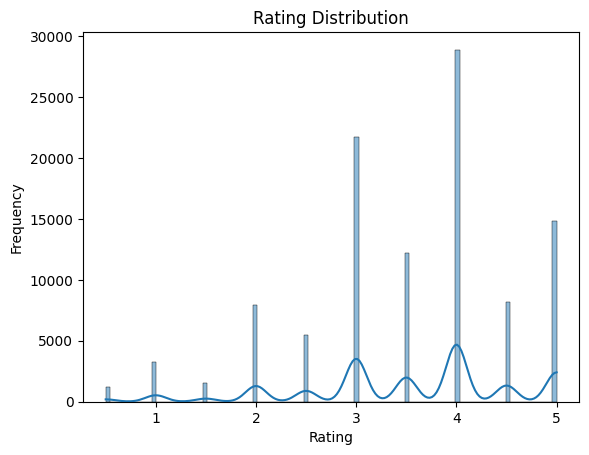

In [9]:
sns.histplot(ratings['rating'], kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


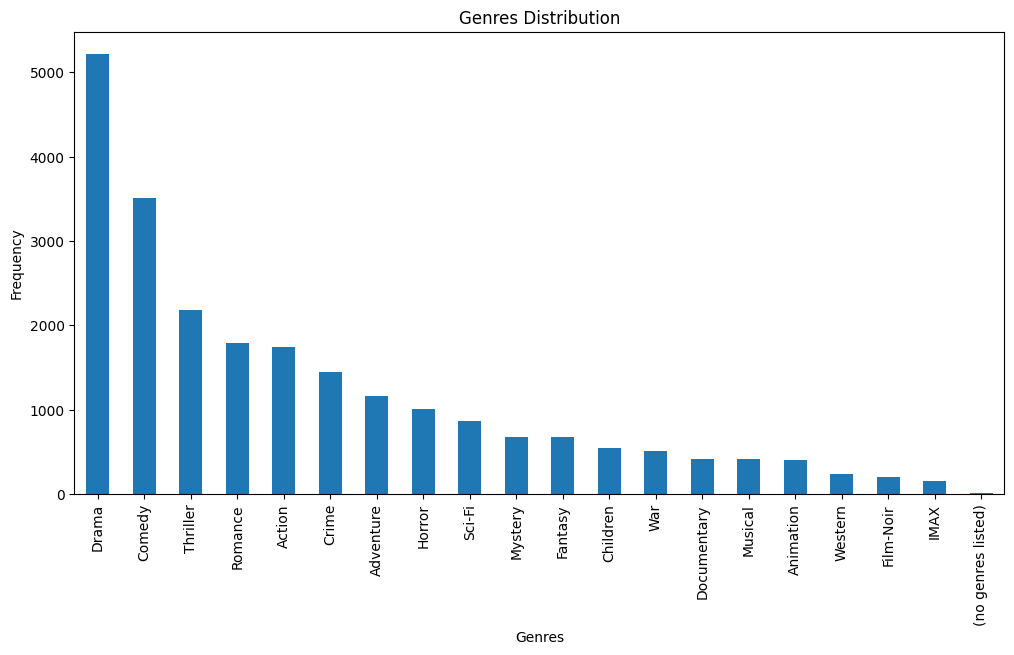

In [10]:
genres = movies['genres'].str.split('|', expand=True).stack().value_counts()
genres.plot(kind='bar', figsize=(12, 6))
plt.title('Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()


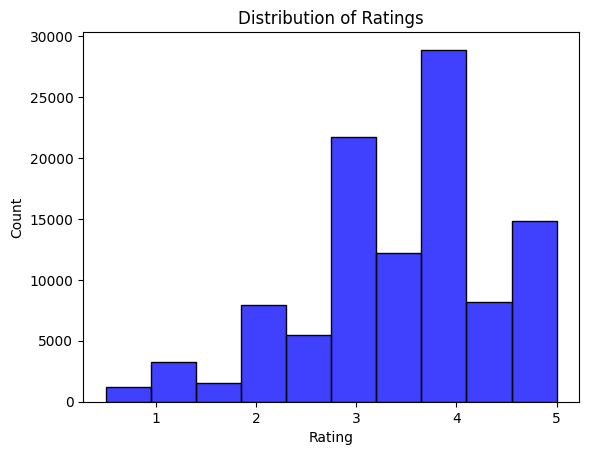

In [11]:
sns.histplot(ratings['rating'], kde=False, bins=10, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


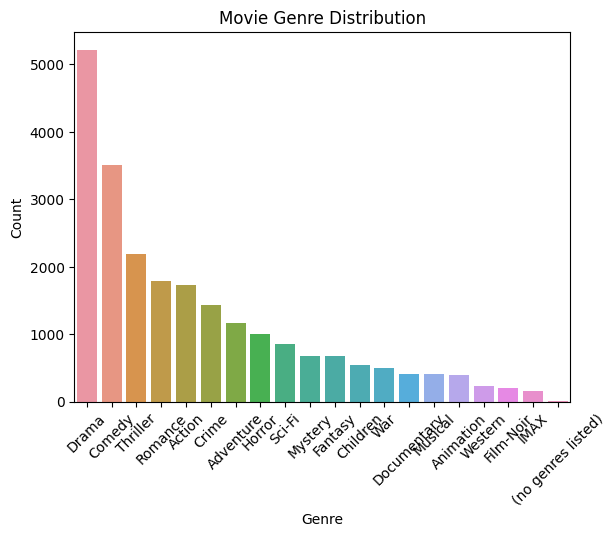

In [12]:
# Split genres and count the occurrences
genres = movies['genres'].str.split('|', expand=True).stack().value_counts()

sns.barplot(x=genres.index, y=genres.values)
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


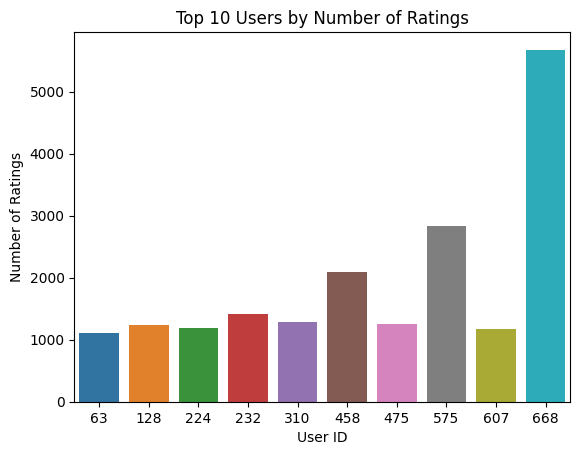

In [13]:
user_ratings = ratings.groupby('userId').size().sort_values(ascending=False).head(10)

sns.barplot(x=user_ratings.index, y=user_ratings.values)
plt.title('Top 10 Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()


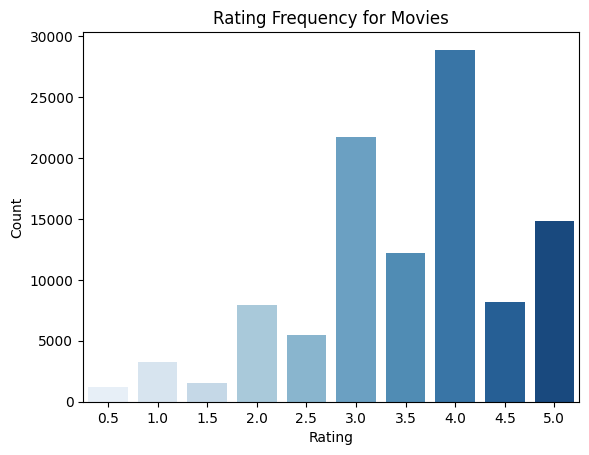

In [14]:
sns.countplot(x='rating', data=ratings, palette='Blues')
plt.title('Rating Frequency for Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


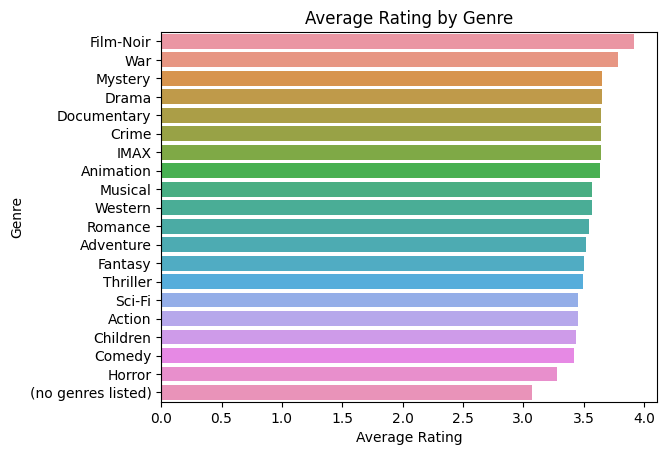

In [15]:
genres_avg = ratings.merge(movies[['movieId', 'genres']], on='movieId')
genres_avg['genres'] = genres_avg['genres'].str.split('|')
genres_avg = genres_avg.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)

sns.barplot(x=genres_avg.values, y=genres_avg.index)
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


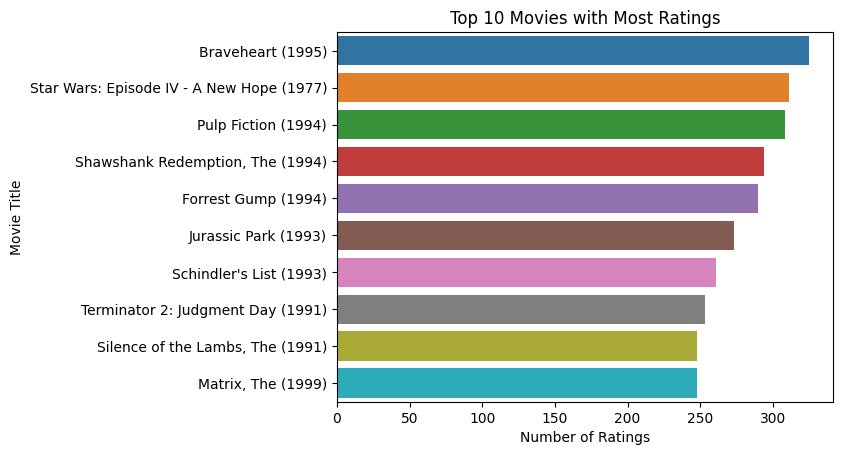

In [16]:
top_10_rated_movies = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_10_movies = movies[movies['movieId'].isin(top_10_rated_movies.index)]

sns.barplot(x=top_10_rated_movies.values, y=top_10_movies['title'])
plt.title('Top 10 Movies with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


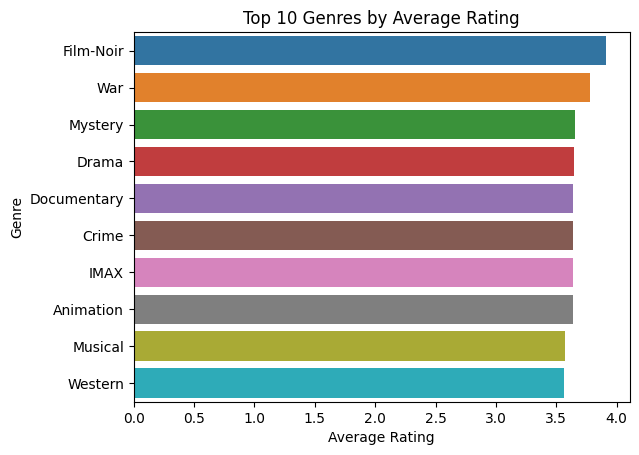

In [17]:
# Merge genres and ratings
genres_avg_rating = ratings.merge(movies[['movieId', 'genres']], on='movieId')
genres_avg_rating['genres'] = genres_avg_rating['genres'].str.split('|')

# Explode genres into multiple rows
genres_avg_rating = genres_avg_rating.explode('genres')

# Group by genre and calculate the mean rating
avg_rating_per_genre = genres_avg_rating.groupby('genres')['rating'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_rating_per_genre.values, y=avg_rating_per_genre.index)
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


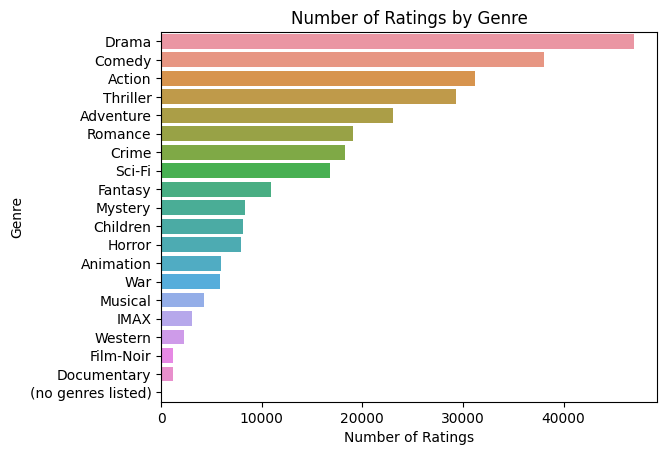

In [18]:
# Count the number of ratings for each genre
genres_rating_count = genres_avg_rating.groupby('genres').size().sort_values(ascending=False)

sns.barplot(x=genres_rating_count.values, y=genres_rating_count.index)
plt.title('Number of Ratings by Genre')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()


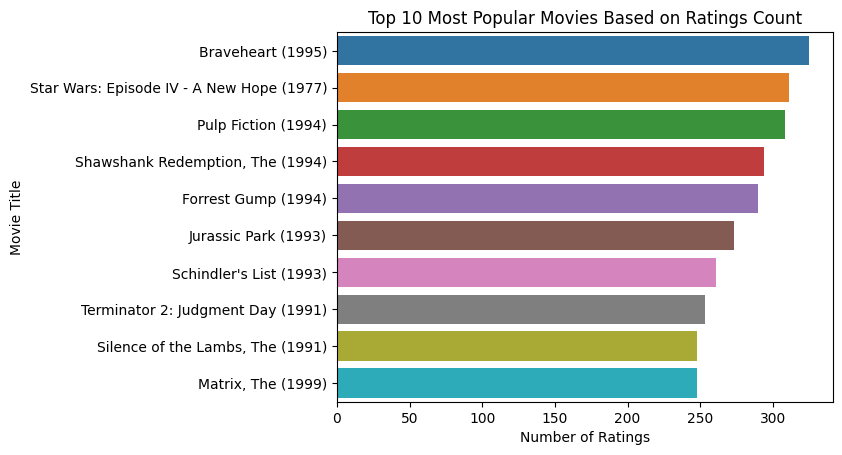

In [19]:
top_10_popular_movies = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_popular_movies = movies[movies['movieId'].isin(top_10_popular_movies.index)]

sns.barplot(x=top_10_popular_movies.values, y=top_popular_movies['title'])
plt.title('Top 10 Most Popular Movies Based on Ratings Count')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


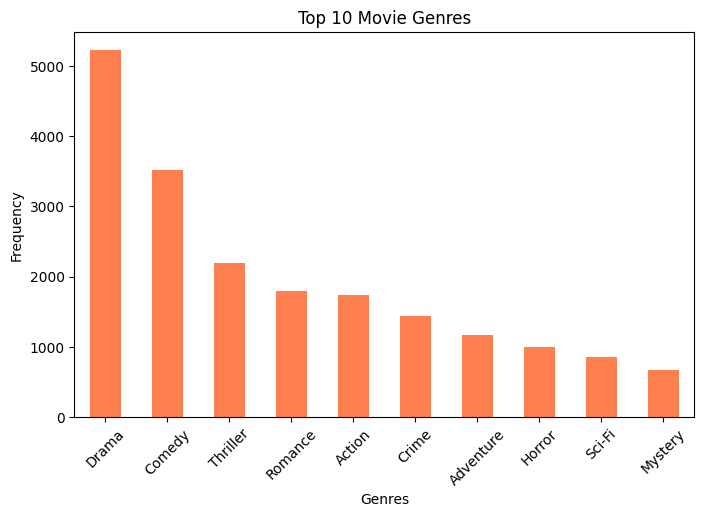

In [20]:
plt.figure(figsize=(8, 5))
top_genres = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', color='coral')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

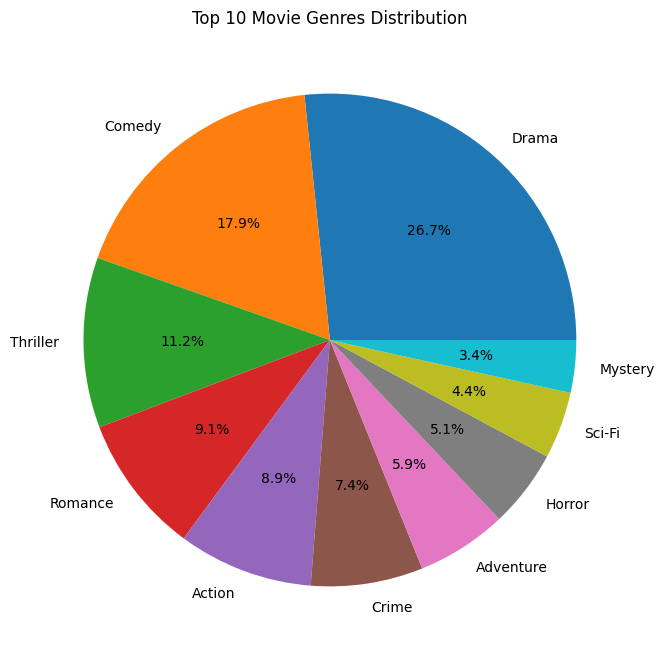

In [21]:
plt.figure(figsize=(10, 8))
top_genres.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 10 Movie Genres Distribution')
plt.ylabel('')
plt.show()

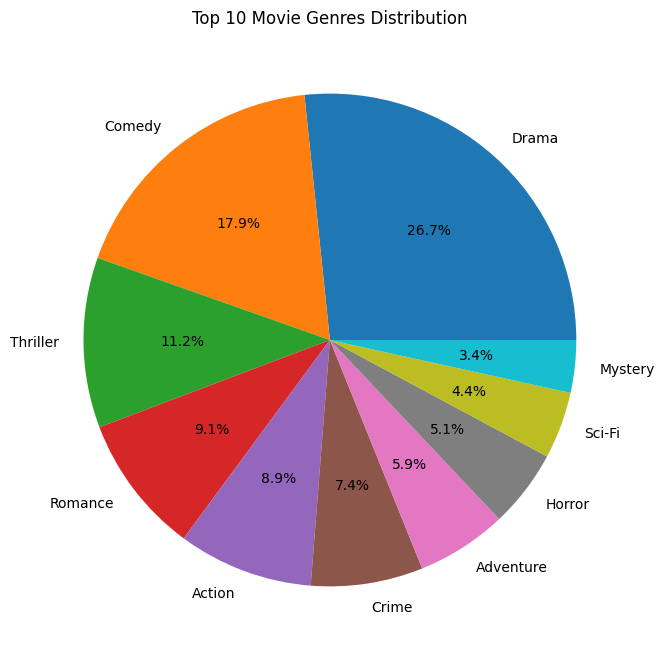

In [22]:
plt.figure(figsize=(10, 8))
top_genres.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 10 Movie Genres Distribution')
plt.ylabel('')
plt.show()

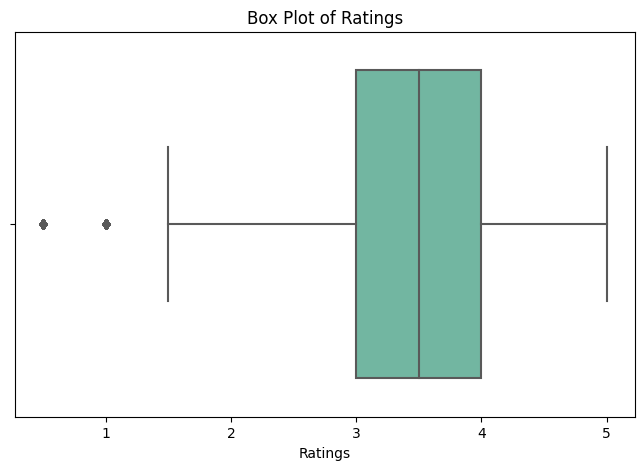

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=ratings, x='rating', palette='Set2')
plt.title('Box Plot of Ratings')
plt.xlabel('Ratings')
plt.show()

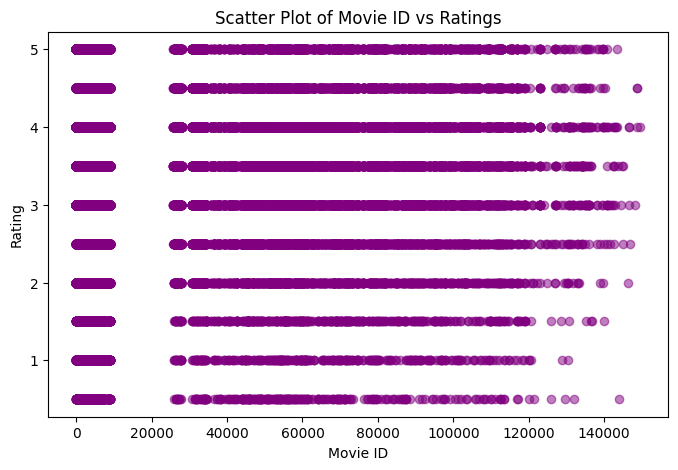

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(ratings['movieId'], ratings['rating'], color='purple', alpha=0.5)
plt.title('Scatter Plot of Movie ID vs Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.show()

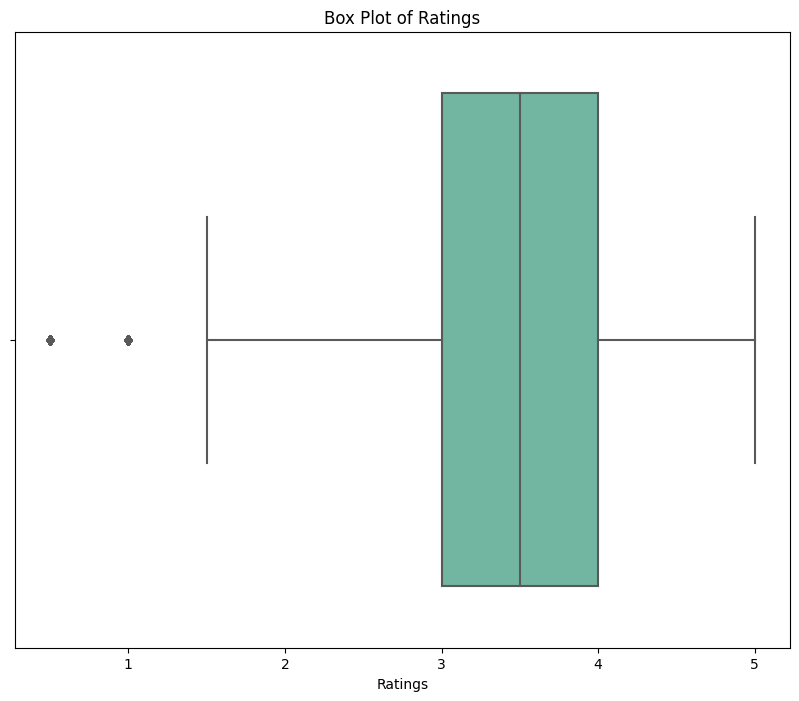

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=ratings, x='rating', palette='Set2')
plt.title('Box Plot of Ratings')
plt.xlabel('Ratings')
plt.show()

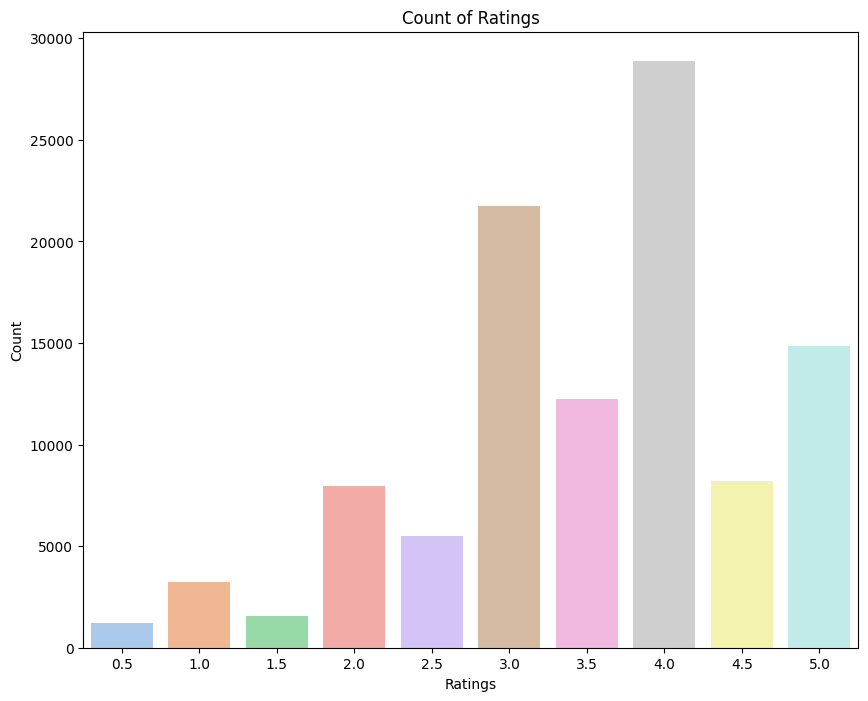

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings, x='rating', palette='pastel')
plt.title('Count of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

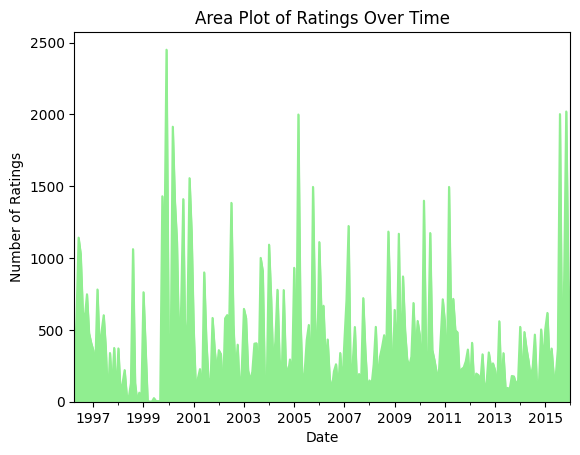

In [27]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.set_index('timestamp').resample('M').size().plot(kind='area', color='lightgreen')
plt.title('Area Plot of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.show()

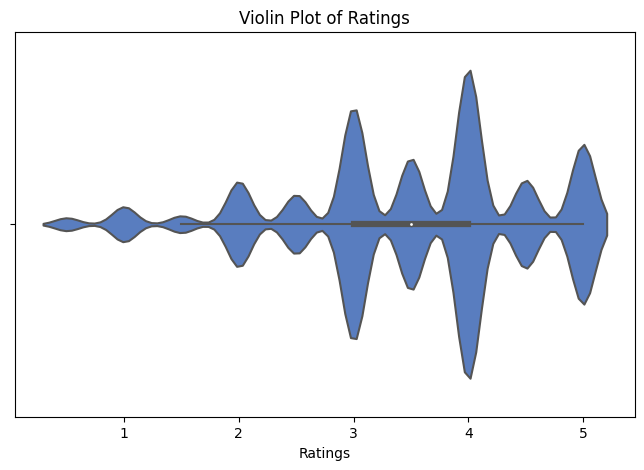

In [28]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=ratings, x='rating', palette='muted')
plt.title('Violin Plot of Ratings')
plt.xlabel('Ratings')
plt.show()

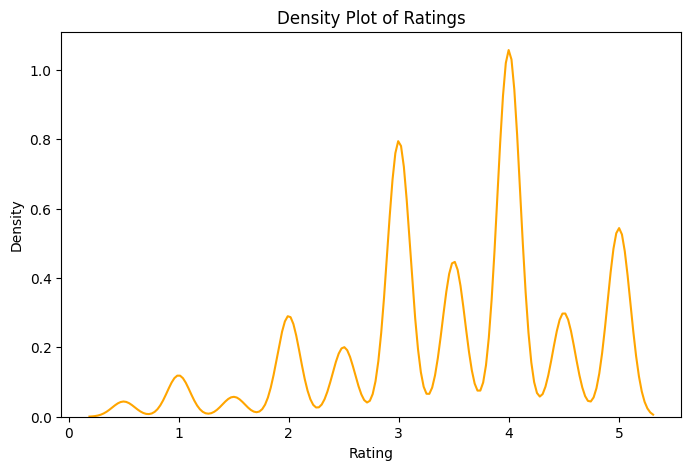

In [29]:
plt.figure(figsize=(8, 5))
sns.kdeplot(ratings['rating'], color='orange')
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

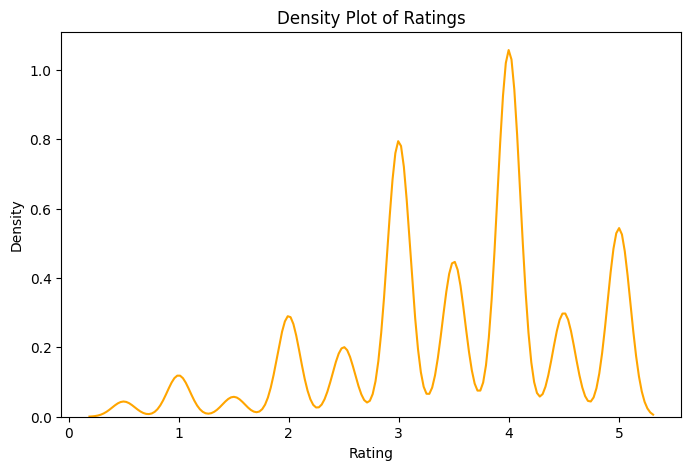

In [30]:
plt.figure(figsize=(8, 5))
sns.kdeplot(ratings['rating'], color='orange')
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

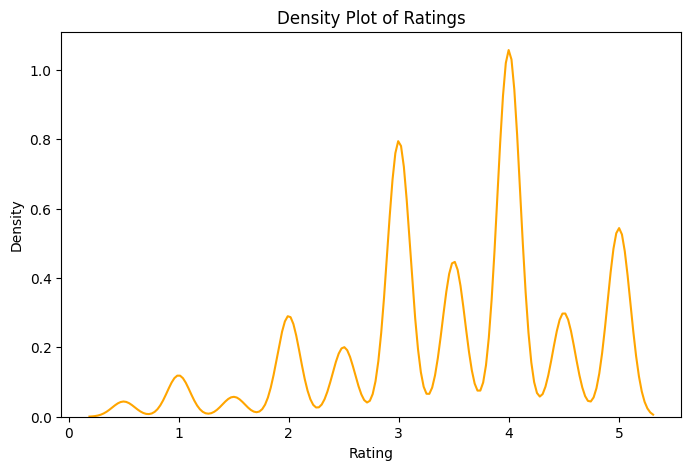

In [31]:
plt.figure(figsize=(8, 5))
sns.kdeplot(ratings['rating'], color='orange')
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

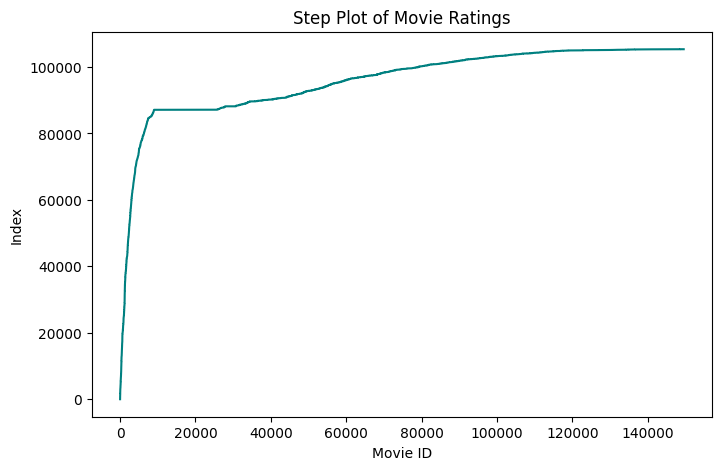

In [32]:
plt.figure(figsize=(8, 5))
plt.step(ratings['movieId'].sort_values(), range(len(ratings)), color='teal')
plt.title('Step Plot of Movie Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Index')
plt.show()

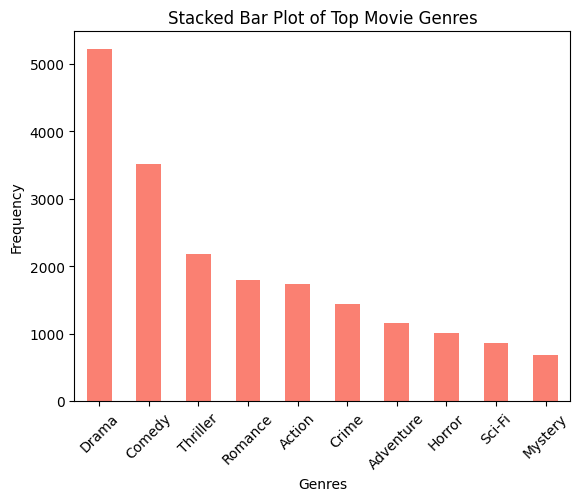

In [33]:
top_genres.plot(kind='bar', stacked=True, color='salmon')
plt.title('Stacked Bar Plot of Top Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

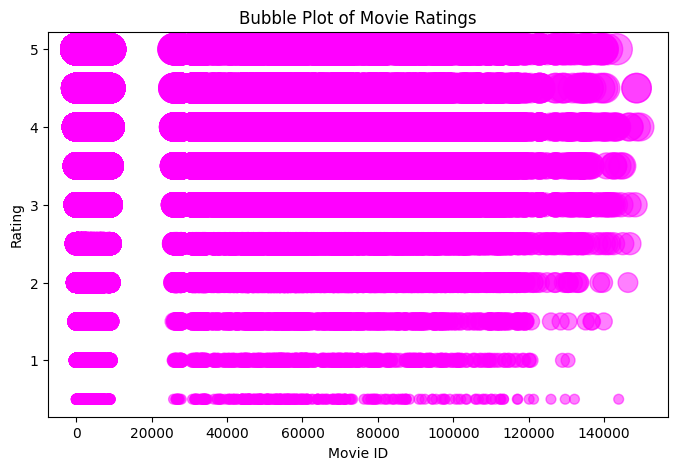

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(ratings['movieId'], ratings['rating'], s=ratings['rating'] * 100, alpha=0.5, color='magenta')
plt.title('Bubble Plot of Movie Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.show()

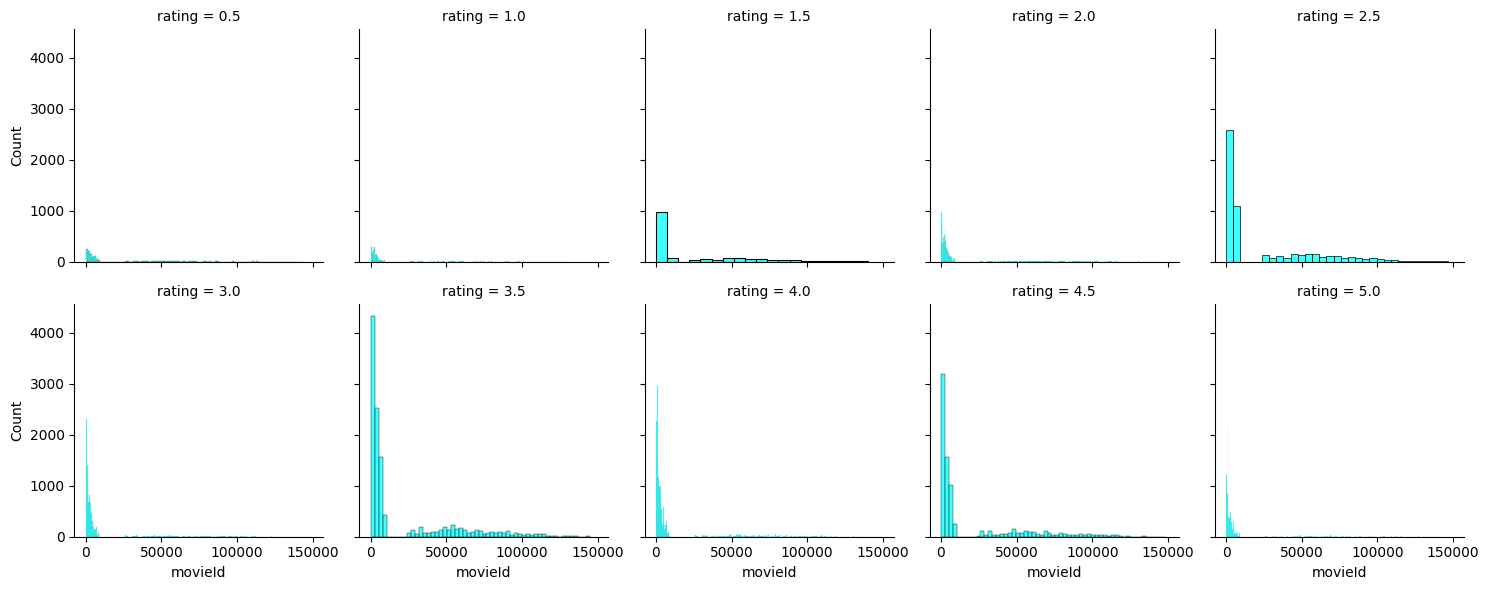

In [35]:
g = sns.FacetGrid(ratings, col='rating', col_wrap=5, height=3)
g.map(sns.histplot, 'movieId', color='cyan')
plt.show()

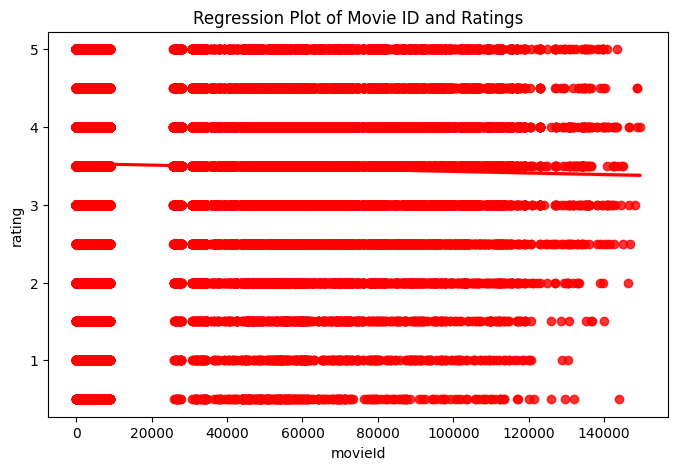

In [36]:
plt.figure(figsize=(8, 5))
sns.regplot(data=ratings, x='movieId', y='rating', color='red')
plt.title('Regression Plot of Movie ID and Ratings')
plt.show()

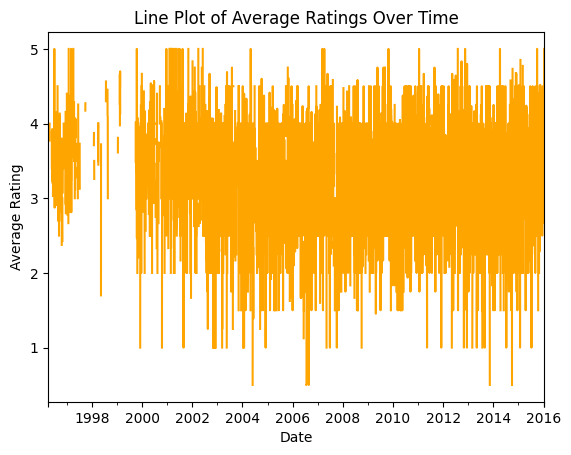

In [37]:
ratings.set_index('timestamp').resample('D')['rating'].mean().plot(color='orange')
plt.title('Line Plot of Average Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

# 5. **Model Development**:
- After thorough exploration and visualization, we design a deep learning model for the recommendation system. This involves creating embedding layers for users and movies, followed by multiple dense layers to capture complex interactions between users and items. We also implement dropout layers for regularization and batch normalization to enhance training stability.

In [38]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

In [39]:
ratings['user'] = user_encoder.fit_transform(ratings['userId'])
ratings['movie'] = movie_encoder.fit_transform(ratings['movieId'])

In [40]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

In [41]:
# Create input arrays
X_train = [train_data['user'], train_data['movie']]
y_train = train_data['rating']

X_test = [test_data['user'], test_data['movie']]
y_test = test_data['rating']


In [42]:
# Number of users and movies
num_users = ratings['user'].nunique()
num_movies = ratings['movie'].nunique()

In [43]:
# Define the inputs
user_input = layers.Input(shape=(1,), name='user')
movie_input = layers.Input(shape=(1,), name='movie')

In [44]:
# Define the Embedding layers with increased dimension
embedding_dim = 128  # Increased embedding dimension for better representation
user_embedding = layers.Embedding(num_users, embedding_dim)(user_input)
movie_embedding = layers.Embedding(num_movies, embedding_dim)(movie_input)


In [45]:
# Flattening to connect to Dense layers
user_vec = layers.Flatten()(user_embedding)
movie_vec = layers.Flatten()(movie_embedding)


In [46]:
# Merge the inputs
merged = layers.Concatenate()([user_vec, movie_vec])

# Add more Dense layers with Batch Normalization and Dropout
dense1 = layers.Dense(512, activation='relu')(merged)  # Increased neurons
bn1 = layers.BatchNormalization()(dense1)  # Batch Normalization
dropout1 = layers.Dropout(0.4)(bn1)  # Increased dropout rate

dense2 = layers.Dense(256, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.3)(bn2)

dense3 = layers.Dense(128, activation='relu')(dropout2)
bn3 = layers.BatchNormalization()(dense3)
dropout3 = layers.Dropout(0.3)(bn3)

output = layers.Dense(1)(dropout3)

# Build the model
model = models.Model(inputs=[user_input, movie_input], outputs=output)

In [47]:
# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 128)         │         85,504 │ user[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 128)         │      1,321,600 │ movie[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 128)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 128)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │        131,584 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512)            │          2,048 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │        131,328 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            129 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,706,625 (6.51 MB)

 Trainable params: 1,704,833 (6.50 MB)

 Non-trainable params: 1,792 (7.00 KB)

# 6. **Model Training and Evaluation**:
- The model is trained on the prepared dataset with a validation split to monitor performance. We implement early stopping to prevent overfitting and evaluate the model using the test dataset.

In [48]:
# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 3.8803 - val_loss: 0.8744
Epoch 2/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.9270 - val_loss: 0.7880
Epoch 3/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.7749 - val_loss: 0.7721
Epoch 4/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.7145 - val_loss: 0.7809
Epoch 5/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.6719 - val_loss: 0.7964
Epoch 6/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.6124 - val_loss: 0.7747
Epoch 7/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.5631 - val_loss: 0.7937
Epoch 8/30
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.5090 - val_loss: 0.8203


In [49]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7577
Test Loss: 0.77037113904953


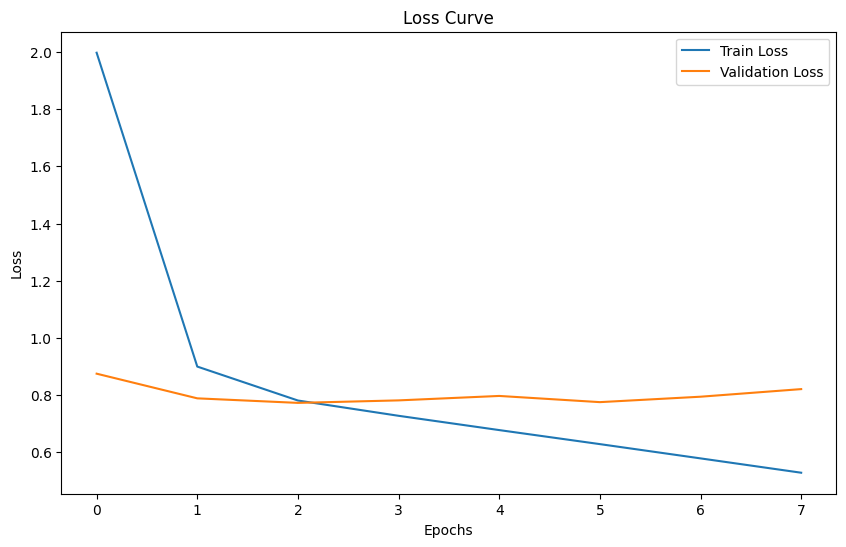

In [50]:
# show Loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


# 7. **Making Predictions**:
- Finally, we demonstrate how to make predictions using the trained model for specific user-movie pairs, showcasing the effectiveness of the recommendation system.

In [51]:
# Save the model
model.save('recommendation_model.h5')

In [52]:
# Load the model
loaded_model = load_model('/kaggle/working/recommendation_model.h5')
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie (InputLayer)        │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 128)         │         85,504 │ user[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 128)         │      1,321,600 │ movie[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 128)            │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 128)            │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │        131,584 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 512)            │          2,048 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │        131,328 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            129 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,706,627 (6.51 MB)

 Trainable params: 1,704,833 (6.50 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 2 (12.00 B)

# Conclusion

Thank you for taking the time to evaluate this notebook! 

In this project, I worked with the **Movies Lens Dataset** to develop a **Recommendation System** using deep learning techniques. 

### Key Highlights:
- **Data Exploration**: I explored the dataset to uncover patterns and trends in movie ratings.
- **Data Cleaning**: I addressed missing values and inconsistencies to ensure data quality.
- **Model Implementation**: I built a collaborative filtering model using deep learning to predict movie ratings.

### Results:
I achieved promising results in predicting ratings, showcasing the power of deep learning in building effective recommendation systems. 

I appreciate your feedback and suggestions for further improvements. Thank you for your support!